<a href="https://colab.research.google.com/github/datilasilva/survey_analysis_HI/blob/main/Delicious_food_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPANY DETAIL

Brand: Delicious Food

Local: Safira city

Product: Brazilian Food

Delicious Food specialty: bread with

meat filling and desserts

New Product: pão de queijo
(“bread cheese”)

Investment request (machines, new
employees, others): 150.000,00 Kr

In [130]:
#import
import numpy as np
import pandas as pd
from collections import Counter
#MATPLOTLIP
import matplotlib.pyplot as plt
from matplotlib import colors
#PLOTLY
import plotly.express as px
#SEABORN
import seaborn as sns
#SCIPY
import scipy.stats as stats

In [131]:
#import data
data_delicious_food = pd.read_csv('/content/drive/MyDrive/Assessement Hyper 2/data_delicious_food.csv',
                      sep=',', encoding='utf-8')

In [132]:
data_delicious_food.head()

,Timestamp,Have you ever consumed any of our products?,"Where you live? (Please, Safira)",Are you vegan or vegetarian?,Are you milk allergic?,Do you prefer meat or cheese?,Would you like more bread or dessert options on our menu?,"On a scale of 1 to 10, how likely are you to try a new flavor of bread with a cheese-filling? 1 is ""I don't want it"" and 10 ""I really want it""."
0,02/02/2022 13:09:35,Yes,Other,No,No,meat,bread options,9
1,02/02/2022 13:14:18,Yes,Safira/Brazil,No,No,Both,bread options,8
2,02/02/2022 13:15:06,Yes,Safira/Brazil,No,No,meat,bread options,10
3,02/02/2022 13:16:45,Yes,Safira/Brazil,No,No,meat,bread options,10
4,02/02/2022 13:21:06,Yes,Safira/Brazil,No,No,cheese,bread options,9


In [133]:
data_delicious_food.shape

(30, 8)

**CLEAR DATA**

In [134]:
data_delicious_food.columns = data_delicious_food.columns.str.replace('"', '')

In [135]:
data_delicious_food.columns = data_delicious_food.columns.str.replace("'", '')

In [136]:
data_delicious_food.columns = data_delicious_food.columns.str.replace('.', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [137]:
data_delicious_food.columns = data_delicious_food.columns.str.replace('1', '')

In [138]:
data_delicious_food.columns = data_delicious_food.columns.str.replace('10', '')

In [139]:
data_delicious_food.columns = data_delicious_food.columns.str.replace('0', '')

In [182]:
data_delicious_food.dtypes

Timestamp                                                                                                                                                               object
Have you ever consumed any of our products?                                                                                                                             object
Where you live? (Please, Safira)                                                                                                                                        object
Are you vegan or vegetarian?                                                                                                                                            object
Are you milk allergic?                                                                                                                                                  object
Do you prefer meat or cheese?                                                                                                

In [140]:
data_delicious_food.head()

,Timestamp,Have you ever consumed any of our products?,"Where you live? (Please, Safira)",Are you vegan or vegetarian?,Are you milk allergic?,Do you prefer meat or cheese?,Would you like more bread or dessert options on our menu?,"On a scale of to , how likely are you to try a new flavor of bread with a cheese-filling? is I dont want it and I really want it"
0,02/02/2022 13:09:35,Yes,Other,No,No,meat,bread options,9
1,02/02/2022 13:14:18,Yes,Safira/Brazil,No,No,Both,bread options,8
2,02/02/2022 13:15:06,Yes,Safira/Brazil,No,No,meat,bread options,10
3,02/02/2022 13:16:45,Yes,Safira/Brazil,No,No,meat,bread options,10
4,02/02/2022 13:21:06,Yes,Safira/Brazil,No,No,cheese,bread options,9


In [141]:
# RENAME
data_clear = data_delicious_food.rename(columns={'Have you ever consumed any of our products?': 'new_old_customers','Where you live? (Please, Safira)': 'demographic', 
                              'Are you vegan or vegetarian?': 'vegan_vegetarian', 'Are you milk allergic?': 'allergic', 'Do you prefer meat or cheese?': 'preference_meat_cheese',
                              'Would you like more bread or dessert options on our menu?': 'preference_bread_dessert', 'Are you milk allergic?': 'allergic', 'Timestamp': 'time',
                              'On a scale of  to , how likely are you to try a new flavor of bread with a cheese-filling?                                   is I dont want it and  I really want it': 'try_new_flavor'})

In [142]:
data_clear.head()

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
0,02/02/2022 13:09:35,Yes,Other,No,No,meat,bread options,9
1,02/02/2022 13:14:18,Yes,Safira/Brazil,No,No,Both,bread options,8
2,02/02/2022 13:15:06,Yes,Safira/Brazil,No,No,meat,bread options,10
3,02/02/2022 13:16:45,Yes,Safira/Brazil,No,No,meat,bread options,10
4,02/02/2022 13:21:06,Yes,Safira/Brazil,No,No,cheese,bread options,9


In [143]:
data_clear.dtypes

time                        object
new_old_customers           object
demographic                 object
vegan_vegetarian            object
allergic                    object
preference_meat_cheese      object
preference_bread_dessert    object
try_new_flavor               int64
dtype: object

In [144]:
#separate by demographic factor
#data_clear['demographic'].value_counts().sort_index()

In [145]:
#separate by demographic factor
#demographic_other = data_clear.loc[data_clear.demographic == 'Other']

In [146]:
#data_safira = data_clear.loc[data_clear.demographic == 'Safira/Brazil']
#data_safira.head()

In [147]:
#frequency distribution
#demographic_distribution = data_clear[data_clear.demographic =='Safira/Brazil']
#demographic_distribution.shape


**DISTRIBUTION DEMOGRAPHIC**

In [148]:
#Counter
absolute_frequency = Counter(data_clear.demographic)
absolute_frequency

Counter({'Other': 13, 'Safira/Brazil': 17})

In [149]:
#create a  DF index
absolute_frequency = pd.DataFrame.from_dict(absolute_frequency, orient='index')

In [150]:
#RELATIVE FREQUENCY: absolute_frequency / absolute_frequency(TOTAL SUM OF)
relative_frequency = absolute_frequency / absolute_frequency.sum()
relative_frequency

,0
Other,0.433333
Safira/Brazil,0.566667


In [151]:
#PORCENTAGE RELATIVE FREQUENCY IS RELATIVE FREQ * 100
relative_frequency_perc = round(relative_frequency * 100,2)
relative_frequency_perc

,0
Other,43.33
Safira/Brazil,56.67


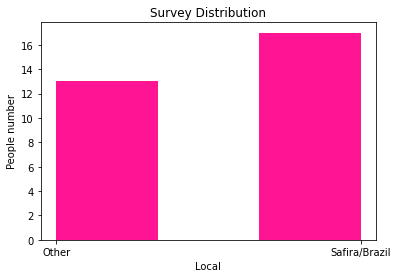

In [152]:
#HISTOGRAMA
#his: histograma call
# bins: colum in histograma
plt.hist(data_clear.demographic, 3, rwidth=1, color='deeppink')
plt.title('Survey Distribution')
plt.xlabel('Local')
plt.ylabel('People number')
plt.show()

In [153]:
#separate by demographic factor
data_safira = data_clear.loc[data_clear.demographic == 'Safira/Brazil']
data_safira.head()

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
1,02/02/2022 13:14:18,Yes,Safira/Brazil,No,No,Both,bread options,8
2,02/02/2022 13:15:06,Yes,Safira/Brazil,No,No,meat,bread options,10
3,02/02/2022 13:16:45,Yes,Safira/Brazil,No,No,meat,bread options,10
4,02/02/2022 13:21:06,Yes,Safira/Brazil,No,No,cheese,bread options,9
6,02/02/2022 13:23:37,Yes,Safira/Brazil,No,No,cheese,bread options,9


In [154]:
#grafico = px.histogram(data_safira, x = "demographic", nbins=10, histnorm='percent', color='vegan_vegetarian')
#grafico.update_layout(width=500,height=500,title_text='Vegan and Vegetarian distribution by demographic', title_font_color = 'black')
#grafico.show()

In [155]:
 #prob_no_vegan_veget = data_clear.loc[data_clear.vegan_vegetarian	== 'No']

In [156]:
prob_eat = data_safira.loc[data_safira.try_new_flavor > 5]

In [157]:
#probability to try a new flavor > 5
p = len(prob_eat) / len(data_safira)
p

1.0

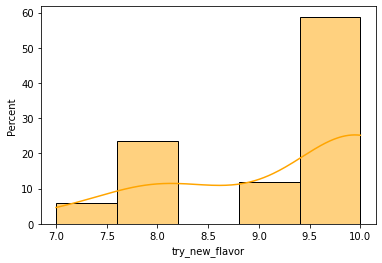

In [158]:
#probability to try a new flavor > 5
sns.histplot(prob_eat, x = "try_new_flavor", bins=5, color="orange", kde=True, stat="percent")

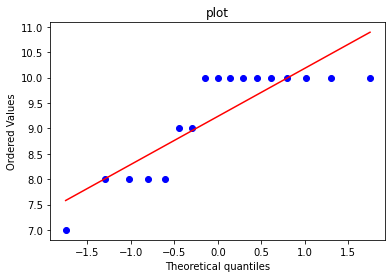

In [159]:
#DISTRIBUTION
stats.probplot(data_safira['try_new_flavor'], dist='norm', plot=plt)
plt.title('plot')
plt.show()
#8, 9 AND 10

In [160]:
people_pref = data_clear[['vegan_vegetarian', 'allergic', 'demographic']]
people_pref

,vegan_vegetarian,allergic,demographic
0,No,No,Other
1,No,No,Safira/Brazil
2,No,No,Safira/Brazil
3,No,No,Safira/Brazil
4,No,No,Safira/Brazil
5,No,No,Other
6,No,No,Safira/Brazil
7,No,No,Safira/Brazil
8,No,No,Safira/Brazil
9,No,No,Other


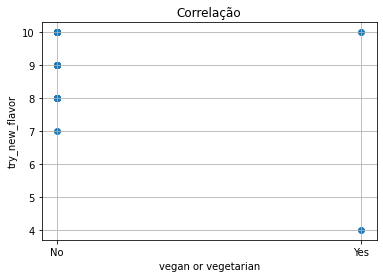

In [161]:
plt.scatter(data_clear.vegan_vegetarian,data_clear.try_new_flavor)
plt.title('Correlação')
plt.xlabel('vegan or vegetarian')
plt.ylabel('try_new_flavor')
plt.grid(True)
plt.show()

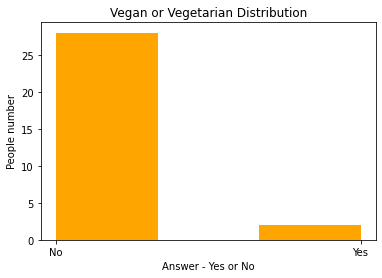

In [162]:
#HISTOGRAMA
#his: histograma call
#vegan_vegetarian	allergic
plt.hist(data_clear.vegan_vegetarian, 3, rwidth=1, color='orange')
plt.title('Vegan or Vegetarian Distribution')
plt.xlabel('Answer - Yes or No')
plt.ylabel('People number')
plt.show()

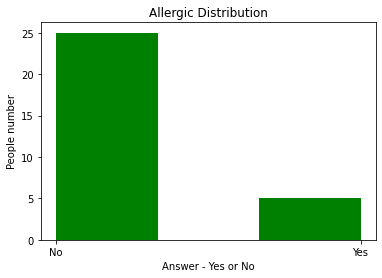

In [163]:
#HISTOGRAMA
#his: histograma call
#allergic
plt.hist(data_clear.allergic, 3, rwidth=1, color='green')
plt.title('Allergic Distribution')
plt.xlabel('Answer - Yes or No')
plt.ylabel('People number')
plt.show()

In [164]:
#ALLERGIC == 'Yes'
veg_plus_allergic1 = data_clear.loc[data_clear.allergic == 'Yes']
veg_plus_allergic1

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
13,02/02/2022 14:23:08,No,Other,No,Yes,meat,dessert options,8
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
16,02/02/2022 14:40:59,No,Other,No,Yes,both,dessert options,9
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4
26,02/02/2022 18:12:53,No,Other,No,Yes,both,bread options,8


In [165]:
#VEGAN OR VEGETARIAN == 'Yes'
veg_plus_allergic2 = data_clear.loc[data_clear.vegan_vegetarian == 'Yes']
veg_plus_allergic2

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4


In [166]:
#YES BOTH
veg_plus_allergic = data_clear.loc[(data_clear.allergic == 'Yes') & (data_clear.vegan_vegetarian == 'Yes')]
veg_plus_allergic

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4


In [167]:
# | is OR - vegan_vegetarian OR	allergic
veg_plus_allergic = data_clear.loc[(data_clear.allergic == 'Yes') | (data_clear.vegan_vegetarian == 'Yes')]
veg_plus_allergic

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
13,02/02/2022 14:23:08,No,Other,No,Yes,meat,dessert options,8
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
16,02/02/2022 14:40:59,No,Other,No,Yes,both,dessert options,9
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4
26,02/02/2022 18:12:53,No,Other,No,Yes,both,bread options,8


In [168]:
veg_plus_allergic3 = data_clear.loc[(data_clear.allergic == 'Yes') + (data_clear.vegan_vegetarian == 'Yes')]
veg_plus_allergic3

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
13,02/02/2022 14:23:08,No,Other,No,Yes,meat,dessert options,8
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
16,02/02/2022 14:40:59,No,Other,No,Yes,both,dessert options,9
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4
26,02/02/2022 18:12:53,No,Other,No,Yes,both,bread options,8


In [169]:
#RENAME
veg_plus_allergic3["vegan_vegetarian"] = veg_plus_allergic3["vegan_vegetarian"].replace({'No':"Yes"})
veg_plus_allergic3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor
13,02/02/2022 14:23:08,No,Other,Yes,Yes,meat,dessert options,8
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10
16,02/02/2022 14:40:59,No,Other,Yes,Yes,both,dessert options,9
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4
26,02/02/2022 18:12:53,No,Other,Yes,Yes,both,bread options,8


In [170]:
total_veg_allergic = ["vegan_vegetarian", "vegan_vegetarian"]

In [171]:
veg_plus_allergic3['total_veg_allergic'] = veg_plus_allergic3[total_veg_allergic].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
veg_plus_allergic3['total_veg_allergic'].value_counts().sort_index()

YesYes    5
Name: total_veg_allergic, dtype: int64

In [173]:
#new colum
veg_plus_allergic3.head()

,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor,total_veg_allergic
13,02/02/2022 14:23:08,No,Other,Yes,Yes,meat,dessert options,8,YesYes
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10,YesYes
16,02/02/2022 14:40:59,No,Other,Yes,Yes,both,dessert options,9,YesYes
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4,YesYes
26,02/02/2022 18:12:53,No,Other,Yes,Yes,both,bread options,8,YesYes


In [174]:
#RENAME
veg_plus_allergic3["total_veg_allergic"] = veg_plus_allergic3["total_veg_allergic"].replace({'YesYes':"Yes"})
veg_plus_allergic3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,new_old_customers,demographic,vegan_vegetarian,allergic,preference_meat_cheese,preference_bread_dessert,try_new_flavor,total_veg_allergic
13,02/02/2022 14:23:08,No,Other,Yes,Yes,meat,dessert options,8,Yes
15,02/02/2022 14:36:04,Yes,Safira/Brazil,Yes,Yes,cheese,bread options,10,Yes
16,02/02/2022 14:40:59,No,Other,Yes,Yes,both,dessert options,9,Yes
25,02/02/2022 16:24:53,Yes,Other,Yes,Yes,both,bread options,4,Yes
26,02/02/2022 18:12:53,No,Other,Yes,Yes,both,bread options,8,Yes


In [175]:
freq = data_clear['allergic'].value_counts()
print(freq)
freq = data_clear['vegan_vegetarian'].value_counts()
print(freq)

No     25
Yes     5
Name: allergic, dtype: int64
No     28
Yes     2
Name: vegan_vegetarian, dtype: int64


In [176]:
#VIZU JOIN
grafico = px.bar(data_clear, x = 'allergic', y ="try_new_flavor", color="allergic",
                 pattern_shape="allergic")
grafico.show()
grafico1 = px.bar(data_clear, x = 'vegan_vegetarian', y ="try_new_flavor", color="vegan_vegetarian",
                 pattern_shape="vegan_vegetarian")
grafico1.show()

CONCLUSION

WE HAVE GOOD ACCEPTANCE OF
THE NEW PRODUCT IN
SAFIRA/BRAZIL AND THE
INVESTMENT IS RECOMMENDED

TO REACH NEW CUSTOMERS WE
CAN INVEST IN PRODUCTS FOR
VEGAN, VEGETARIAN OR
ALLERGIC

WE HAVE CUSTOMERS IN OTHER
REGIONS AND WE CAN STUDY THE
POSSIBILITY OF BRANCHES